## First Neural Network with PyTorch

In [1]:
import numpy as np
import torch
from torch import nn
import matplotlib.pyplot as plt

torch.__version__, np.__version__

('2.0.0+cu117', '1.24.2')

In [2]:
def create_data():
    weight = 0.7
    bias = 0.3
    
    X = torch.arange(0, 1, 0.02).unsqueeze(dim=1)
    y = X * weight + bias
    
    return X, y


def plot_predictions(X_tr, y_tr, X_te, predictions=None):
    plt.figure(figsize=(10,7))
    plt.scatter(X_tr, y_tr, c="b", label="Testing data")
    
    if predictions:
        plt.scatter(X_te, predictions, c="r", label="Predictions")
    
    plt.legend()

In [3]:
# Creating data
X, y = create_data()

# Splitting data into training and test set 
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

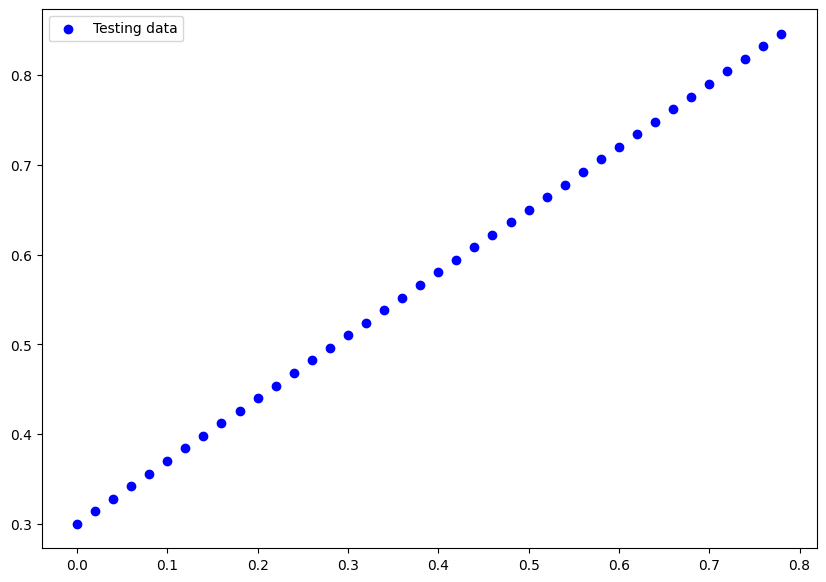

In [4]:
#Visualizing data
plot_predictions(X_train, y_train, X_test)